In [32]:
from collections import Counter
from rdkit import Chem
import pandas as pd
import os

In [16]:
compound_info = pd.read_csv("../data/chembl_processed/compound_info.csv")
compound_info_standardized = pd.read_csv("../data/chembl_processed/compound_info_standardized.csv")

In [19]:
compound_info_standardized

,Unnamed: 0,standardized_smiles,standardized_MW
0,0,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,341.754
1,1,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1,332.319
2,2,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1,357.797
3,3,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1,307.309
4,4,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1,341.754
...,...,...,...
9995,9995,CN(C)[C@@H]1C(=O)C(C(N)=O)=C(O)[C@@]2(O)C(=O)C...,429.429
9996,9996,N#Cc1[nH]c(Cc2[nH]c(Cc3[nH]c(Cc4[nH]c(CO)c(CC(...,879.829
9997,9997,O=C(O)CCc1c[nH]c(Cc2[nH]c(Cc3[nH]c(Cc4[nH]c(CO...,854.819
9998,9998,O=C(O)CCc1c[nH]c(Cc2[nH]c(Cc3[nH]c(Cc4[nH]c(CO...,854.819


In [23]:
compound_info["standardized_smiles"] = compound_info_standardized['standardized_smiles']
compound_info["standardized_MW"] = compound_info_standardized['standardized_MW']

In [26]:
Counter(compound_info['MW'] == compound_info['standardized_MW'])

Counter({False: 2845231, True: 9584})

In [29]:
Counter(compound_info['MW'] >= compound_info['standardized_MW'])

Counter({False: 2844815, True: 10000})

In [28]:
Counter(compound_info['canonical_smiles'] == compound_info['standardized_smiles'])

Counter({False: 2845231, True: 9584})

In [38]:
compound_info['MW_difference'] = [i-j for i,j in compound_info[['MW', 'standardized_MW']].values]

In [51]:
compound_info.sort_values('MW_difference', ascending=False)[:5].values

array([[2280,
        'InChI=1S/C18H21N9O3.2C2HF3O2/c1-27(8-10-7-22-15-13(23-10)14(20)25-18(21)26-15)11-4-2-9(3-5-11)16(28)24-12(6-19)17(29)30;2*3-2(4,5)1(6)7/h2-5,7,12H,6,8,19H2,1H3,(H,24,28)(H,29,30)(H4,20,21,22,25,26);2*(H,6,7)',
        'BIIMKXURMSHYAE-UHFFFAOYSA-N',
        'CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)NC(CN)C(=O)O)cc1.O=C(O)C(F)(F)F.O=C(O)C(F)(F)F',
        'CHEMBL7554', 639.47,
        'CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)NC(CN)C(=O)O)cc1', 411.426,
        228.04400000000004],
       [2553,
        'InChI=1S/C19H23N9O3.2C2HF3O2/c1-28(9-11-8-23-16-14(24-11)15(21)26-19(22)27-16)12-4-2-10(3-5-12)17(29)25-13(6-7-20)18(30)31;2*3-2(4,5)1(6)7/h2-5,8,13H,6-7,9,20H2,1H3,(H,25,29)(H,30,31)(H4,21,22,23,26,27);2*(H,6,7)',
        'RVLLECVFRHCFCQ-UHFFFAOYSA-N',
        'CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)NC(CCN)C(=O)O)cc1.O=C(O)C(F)(F)F.O=C(O)C(F)(F)F',
        'CHEMBL7239', 653.497,
        'CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)NC(CCN)C(=O)O)cc1', 425.453,
        228.0439999999999

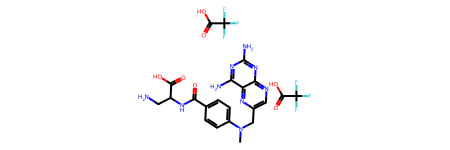

In [52]:
Chem.MolFromSmiles("CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)NC(CN)C(=O)O)cc1.O=C(O)C(F)(F)F.O=C(O)C(F)(F)F")

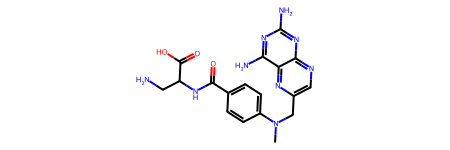

In [53]:
Chem.MolFromSmiles("CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)NC(CN)C(=O)O)cc1")